In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import networkx as nx


In [2]:
dataset = "./New-Dataset/"

lab_files_path = dataset+"labels/"

# total invoice files
files = os.listdir(lab_files_path)


# training set
Batch_1 = files[:30]

Batch_2 = files[30:60]

Batch_3 = files[60:90]

# validation set
valid_set = files[90:95]

# test set
test = files[95:100]

print("Total Label files are: ", len(files))
print("Training Batch-1 files are: ", len(Batch_1))
print("Training Batch-2 files are: ", len(Batch_2))
print("Training Batch-3 files are: ", len(Batch_3))
print("Validation files are: ", len(valid_set))
print("Testing files are: ", len(test))


Total Label files are:  110
Training Batch-1 files are:  30
Training Batch-2 files are:  30
Training Batch-3 files are:  30
Validation files are:  5
Testing files are:  5


In [3]:
df = 0
xMIN, xMAX = [], []
yMIN, yMAX = [], []
Text = []


def findRight(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmax = xMAX[df_ind]
    ymin = yMIN[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(xMIN[i] > xmax):
            if not (yMIN[i] > ymax or yMAX[i] < ymin):
                if(yMIN[i] <= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] <= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] == ymin and yMAX[i] == ymax):
                    S_list.append(i)

    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(xMIN[consec] > xMIN[j]):
                consec = j
        return consec

    return -1


def findLeft(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    ymin = yMIN[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(xMAX[i] < xmin):
            if not (yMIN[i] > ymax or yMAX[i] < ymin):
                if(yMIN[i] <= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] <= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] == ymin and yMAX[i] == ymax):
                    S_list.append(i)

    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(xMAX[j] > xMAX[consec]):
                consec = j
        return consec
    return -1


def findUp(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    xmax = xMAX[df_ind]
    ymin = yMIN[df_ind]

    for i in range(len(df)):
        if(yMAX[i] < ymin):
            if not (xMAX[i] < xmin or xMIN[i] > xmax):
                if(xMIN[i] <= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] <= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] == xmin and xMAX[i] == xmax):
                    S_list.append(i)

    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(yMAX[j] > yMAX[consec]):
                consec = j
        return consec

    return -1


def findDown(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    xmax = xMAX[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(yMIN[i] > ymax):
            if not (xMAX[i] < xmin or xMIN[i] > xmax):
                if(xMIN[i] <= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] <= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] == xmin and xMAX[i] == xmax):
                    S_list.append(i)

    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(yMIN[j] < yMIN[consec]):
                consec = j
        return consec

    return -1


def makeGraph(df):
    G = nx.Graph()
    xMIN = df['xmin']
    xMAX = df['xmax']
    yMIN = df['ymin']
    yMAX = df['ymax']
    Text = df['Object']

    for i in range(len(df)):
        if findUp(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findUp(df, i, xMIN, xMAX, yMIN, yMAX)
            if(l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findRight(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findRight(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findDown(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findDown(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findLeft(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findLeft(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
    return G


In [4]:
def alignDiagonally(M1, M2, prev_Len):
    for i in range(prev_Len, np.shape(M1)[0]):
        for j in range(prev_Len, np.shape(M1)[0]):
            x = i - prev_Len
            y = j - prev_Len
            M1[i][j] = M2[x][y]

    return M1


def resizeMatrix(M, I):
    oldMat_Len = np.shape(M)[0]
    z = np.zeros((oldMat_Len, np.shape(I)[0]), dtype=np.int64)
    newArray = np.append(M, z, axis=1)
    M = newArray

    # Appending 1D arrays of zeros in the original Matrix
    # (i.e. the matrix in which we want to align othe rmatrices diagonally)
    appZero = np.shape(I)[0]
    x = oldMat_Len + appZero
    L = np.zeros((np.shape(I)[0], x), dtype=np.int64)
    newArray = np.append(M, L, axis=0)
    M = newArray

    M = alignDiagonally(M, I, oldMat_Len)
    return M


In [5]:
def fileTextLabels_List(s, e):
    Text_List = []
    Labels_List = []

    for i in range(s, e):
        df = pd.read_csv(lab_files_path+files[i])
        Text = df['Object'].to_list()
        F_Labels = df['labels'].to_list()
        Text_List.append(Text)
        Labels_List.append(F_Labels)

    return Text_List, Labels_List


def alignLabels(G_List, T_List, L_List):
    Aligned_Labels = []
    labels = []
    for i in range(len(G_List)):
        for j in G_List[i]:
            n_Index = T_List[i].index(j)
            labels.append(L_List[i][n_Index])
        Aligned_Labels.append(labels)

    return labels


In [6]:
# Making list of nodes to be embedded..

def getNodes_forEmbeddings(G_List):
    emb_nodes = []
    for G in G_List:
        for N in G:
            emb_nodes.append(N)

    return emb_nodes


In [7]:
Big_G = nx.Graph()

In [8]:
Obj_List = fileTextLabels_List(0, 30)[0]
Lab_List = fileTextLabels_List(0, 30)[1]

GNodes_List_B1 = []

Z_file = lab_files_path + Batch_1[0]
df = pd.read_csv(Z_file)
G = makeGraph(df)
Big_G = nx.compose(Big_G, G)
GNodes_List_B1.append(G.nodes())
M1 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(1, len(Batch_1)):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + Batch_1[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe.
    G = makeGraph(df)
    Big_G = nx.compose(Big_G, G)
    GNodes_List_B1.append(G.nodes())
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M1 = resizeMatrix(M1, I)

print("Dimentions of Batch 1 matrix is: ", np.shape(M1))

B1_Labels = alignLabels(GNodes_List_B1, Obj_List, Lab_List)
b1_Nodes = getNodes_forEmbeddings(GNodes_List_B1)



= = = = = = = = = = = = = = = =
Iteration No.:  1

= = = = = = = = = = = = = = = =
Iteration No.:  2

= = = = = = = = = = = = = = = =
Iteration No.:  3

= = = = = = = = = = = = = = = =
Iteration No.:  4

= = = = = = = = = = = = = = = =
Iteration No.:  5

= = = = = = = = = = = = = = = =
Iteration No.:  6

= = = = = = = = = = = = = = = =
Iteration No.:  7

= = = = = = = = = = = = = = = =
Iteration No.:  8

= = = = = = = = = = = = = = = =
Iteration No.:  9

= = = = = = = = = = = = = = = =
Iteration No.:  10

= = = = = = = = = = = = = = = =
Iteration No.:  11

= = = = = = = = = = = = = = = =
Iteration No.:  12

= = = = = = = = = = = = = = = =
Iteration No.:  13

= = = = = = = = = = = = = = = =
Iteration No.:  14

= = = = = = = = = = = = = = = =
Iteration No.:  15

= = = = = = = = = = = = = = = =
Iteration No.:  16

= = = = = = = = = = = = = = = =
Iteration No.:  17

= = = = = = = = = = = = = = = =
Iteration No.:  18

= = = = = = = = = = = = = = = =
Iteration No.:  19

= = = = = = = = = = 

In [9]:
Obj_List = fileTextLabels_List(30, 60)[0]
Lab_List = fileTextLabels_List(30, 60)[1]

GNodes_List_B2 = []

Z1_file = lab_files_path + Batch_2[0]
df = pd.read_csv(Z1_file)
G = makeGraph(df)
Big_G = nx.compose(Big_G, G)
GNodes_List_B2.append(G.nodes())
M2 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(1, len(Batch_2)):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + Batch_2[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe.
    G = makeGraph(df)
    Big_G = nx.compose(Big_G, G)
    GNodes_List_B2.append(G.nodes())
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M2 = resizeMatrix(M2, I)

print("Dimentions of Batch 2 matrix is: ", np.shape(M2))

B2_Labels = alignLabels(GNodes_List_B2, Obj_List, Lab_List)
b2_Nodes = getNodes_forEmbeddings(GNodes_List_B2)



= = = = = = = = = = = = = = = =
Iteration No.:  1

= = = = = = = = = = = = = = = =
Iteration No.:  2

= = = = = = = = = = = = = = = =
Iteration No.:  3

= = = = = = = = = = = = = = = =
Iteration No.:  4

= = = = = = = = = = = = = = = =
Iteration No.:  5

= = = = = = = = = = = = = = = =
Iteration No.:  6

= = = = = = = = = = = = = = = =
Iteration No.:  7

= = = = = = = = = = = = = = = =
Iteration No.:  8

= = = = = = = = = = = = = = = =
Iteration No.:  9

= = = = = = = = = = = = = = = =
Iteration No.:  10

= = = = = = = = = = = = = = = =
Iteration No.:  11

= = = = = = = = = = = = = = = =
Iteration No.:  12

= = = = = = = = = = = = = = = =
Iteration No.:  13

= = = = = = = = = = = = = = = =
Iteration No.:  14

= = = = = = = = = = = = = = = =
Iteration No.:  15

= = = = = = = = = = = = = = = =
Iteration No.:  16

= = = = = = = = = = = = = = = =
Iteration No.:  17

= = = = = = = = = = = = = = = =
Iteration No.:  18

= = = = = = = = = = = = = = = =
Iteration No.:  19

= = = = = = = = = = 

In [10]:
Obj_List = fileTextLabels_List(60, 90)[0]
Lab_List = fileTextLabels_List(60, 90)[1]

GNodes_List_B3 = []

Z2_file = lab_files_path + Batch_3[0]
df = pd.read_csv(Z2_file)
G = makeGraph(df)
Big_G = nx.compose(Big_G, G)
GNodes_List_B3.append(G.nodes())
M3 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(1, len(Batch_3)):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + Batch_3[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe.
    G = makeGraph(df)
    Big_G = nx.compose(Big_G, G)
    GNodes_List_B3.append(G.nodes())
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M3 = resizeMatrix(M3, I)

print("Dimentions of Batch 3 matrix is: ", np.shape(M3))

B3_Labels = alignLabels(GNodes_List_B3, Obj_List, Lab_List)
b3_Nodes = getNodes_forEmbeddings(GNodes_List_B3)



= = = = = = = = = = = = = = = =
Iteration No.:  1

= = = = = = = = = = = = = = = =
Iteration No.:  2

= = = = = = = = = = = = = = = =
Iteration No.:  3

= = = = = = = = = = = = = = = =
Iteration No.:  4

= = = = = = = = = = = = = = = =
Iteration No.:  5

= = = = = = = = = = = = = = = =
Iteration No.:  6

= = = = = = = = = = = = = = = =
Iteration No.:  7

= = = = = = = = = = = = = = = =
Iteration No.:  8

= = = = = = = = = = = = = = = =
Iteration No.:  9

= = = = = = = = = = = = = = = =
Iteration No.:  10

= = = = = = = = = = = = = = = =
Iteration No.:  11

= = = = = = = = = = = = = = = =
Iteration No.:  12

= = = = = = = = = = = = = = = =
Iteration No.:  13

= = = = = = = = = = = = = = = =
Iteration No.:  14

= = = = = = = = = = = = = = = =
Iteration No.:  15

= = = = = = = = = = = = = = = =
Iteration No.:  16

= = = = = = = = = = = = = = = =
Iteration No.:  17

= = = = = = = = = = = = = = = =
Iteration No.:  18

= = = = = = = = = = = = = = = =
Iteration No.:  19

= = = = = = = = = = 

In [11]:
Obj_List = fileTextLabels_List(90, 95)[0]
Lab_List = fileTextLabels_List(90, 95)[1]

GNodes_List_Valid = []

Z3_file = lab_files_path + valid_set[0]
df = pd.read_csv(Z3_file)
G = makeGraph(df)
Big_G = nx.compose(Big_G, G)
GNodes_List_Valid.append(G.nodes())
M4 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(1, len(valid_set)):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + valid_set[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe.
    G = makeGraph(df)
    Big_G = nx.compose(Big_G, G)
    GNodes_List_Valid.append(G.nodes())
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M4 = resizeMatrix(M4, I)

print("Dimentions of Validation matrix is: ", np.shape(M4))

valid_Labels = alignLabels(GNodes_List_Valid, Obj_List, Lab_List)
valid_Nodes = getNodes_forEmbeddings(GNodes_List_Valid)



= = = = = = = = = = = = = = = =
Iteration No.:  1

= = = = = = = = = = = = = = = =
Iteration No.:  2

= = = = = = = = = = = = = = = =
Iteration No.:  3

= = = = = = = = = = = = = = = =
Iteration No.:  4
Dimentions of Validation matrix is:  (1052, 1052)


In [12]:
Obj_List = fileTextLabels_List(95, 100)[0]
Lab_List = fileTextLabels_List(95, 100)[1]

GNodes_List_Test = []

Z4_file = lab_files_path + test[0]
df = pd.read_csv(Z4_file)
G = makeGraph(df)
GNodes_List_Test.append(G.nodes)
M5 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(1, len(test)):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + test[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe.
    G = makeGraph(df)
    GNodes_List_Test.append(G.nodes)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M5 = resizeMatrix(M5, I)

print("Dimentions of Batch 3 matrix is: ", np.shape(M5))

test_Labels = alignLabels(GNodes_List_Test, Obj_List, Lab_List)
Test_Nodes = getNodes_forEmbeddings(GNodes_List_Test)



= = = = = = = = = = = = = = = =
Iteration No.:  1

= = = = = = = = = = = = = = = =
Iteration No.:  2

= = = = = = = = = = = = = = = =
Iteration No.:  3

= = = = = = = = = = = = = = = =
Iteration No.:  4
Dimentions of Batch 3 matrix is:  (1012, 1012)


In [13]:
nx.write_gpickle(Big_G, "./Graph DS/Large_Invoice_Graph.gpickle")


In [14]:
print("Saving Matrix")
# np.save("./Matrices/Matrix_b1.npy", M1)
np.save("./IDS Model File Matrices/Train_B1.npy", M1)
np.save("./IDS Model File Matrices/Train_B2.npy", M2)
np.save("./IDS Model File Matrices/Train_B3.npy", M3)
np.save("./IDS Model File Matrices/Validation.npy", M4)
np.save("./IDS Model File Matrices/Test.npy", M5)


Saving Matrix


In [15]:
A1 = np.load("./IDS Model File Matrices/Train_B1.npy")
A2 = np.load("./IDS Model File Matrices/Train_B2.npy")
A3 = np.load("./IDS Model File Matrices/Train_B3.npy")
A4 = np.load("./IDS Model File Matrices/Validation.npy")
A5 = np.load("./IDS Model File Matrices/Test.npy")

(3718, 3718)


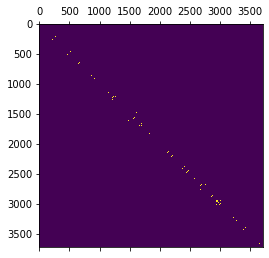

In [16]:
plt.matshow(A1)
print(np.shape(A1))


In [17]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()
b1_enc = label_encoder.fit_transform(B1_Labels)
b2_enc = label_encoder.fit_transform(B2_Labels)
b3_enc = label_encoder.fit_transform(B3_Labels)
val_enc = label_encoder.fit_transform(valid_Labels)


In [30]:
# from tensorflow.keras import Sequential

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Activation
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.regularizers import l2


from spektral.utils.sparse import sp_matrix_to_sp_tensor
from spektral.layers import GeneralConv
from spektral.utils.sparse import sp_matrix_to_sp_tensor

import matplotlib.pyplot as plt
print("Libraries Imported..")


Libraries Imported..


In [42]:
# Hyper-parameters
dropout = 0.5
learning_rate = 1e-2
l2_reg = 0.001
batch_size = 16
es_patience = 10


In [20]:
# Loading Large Invoice Graph

B_G = nx.read_gpickle("./Graph DS/Large_Invoice_Graph.gpickle")


In [21]:
import random
random.seed(666)


def random_walk(G, start=None, path_length=20, alpha=0, rand=random.Random()):
    '''return a random walk path'''
    if start:
        path = [start]
    else:
        path = [rand.choice(list(G.nodes()))]
    while len(path) < path_length:
        cur = path[-1]
        #find it's neighbors
        if len(G[cur]) > 0:
            if rand.random() >= alpha:
                path.append(rand.choice(list(nx.all_neighbors(G, cur))))
            else:
                path.append(path[0])
        else:
            break
    return path


In [22]:
def build_deepwalk_corpus(G, num_paths, rand=random.Random()):
    walks = []
    nodes = list(G.nodes())
    for i in range(num_paths):
        rand.shuffle(nodes)
        for node in nodes:
            walks.append(random_walk(G, start=node))
    return walks


In [54]:
from gensim.models import Word2Vec
corpus = build_deepwalk_corpus(B_G, num_paths=20)
model = Word2Vec(corpus, window=2, min_count=1, sg=1)
model.build_vocab(corpus)


In [55]:
model.train(corpus, total_examples=len(corpus),
            epochs=30, report_delay=1)

(36464588, 37560000)

In [56]:
model.save('./Model/Invoice_Word2Vec_Model.bin')


In [77]:
Emb_Model = "./Model/Word2Vec_Model.bin"
Loaded_model = Word2Vec.load(Emb_Model)

b1_embeddings = []
for t in b1_Nodes:
    b1_embeddings.append(Loaded_model.wv[t])
    
b1_embeddings = np.array(b1_embeddings)
print(b1_embeddings)

[[-0.10385314  0.24354957  0.36528975 ...  0.9206344   0.09035124
   0.72981817]
 [ 0.61951494 -0.2496632  -0.09683825 ...  0.18802683  0.6592803
  -0.02442376]
 [ 0.20067692  0.03827768  0.4675497  ... -0.634448   -0.20340614
  -0.3529818 ]
 ...
 [-0.4668496   0.9358245   0.89674324 ... -0.4924373   0.0438298
  -0.06761286]
 [-0.26520106  0.70423764  0.47755343 ... -0.27639464  0.2122616
  -0.08073346]
 [-0.4083954   0.79292566  0.8033282  ...  0.0641167  -0.44379827
  -0.20955402]]


In [81]:
Loaded_model.wv.most_similar('Date')


[('13,', 0.6217173933982849),
 ('Payment:', 0.5896281599998474),
 ('Po', 0.5721026062965393),
 ('(RC)', 0.571902871131897),
 ('(K', 0.5705458521842957),
 ('25/10/2017', 0.5562668442726135),
 ('PYease', 0.5494760274887085),
 ('Rep', 0.5474662184715271),
 ('1/3/2018', 0.534030556678772),
 ('(GB)', 0.5310888886451721)]

In [71]:
N = A1.shape[0]
F = np.shape(b1_embeddings)[1]
train_embeddings = np.array(b1_embeddings)
print(F)

classes = len(set(b1_enc))
print("Total classes are: ", classes)

# X_in = Input(batch_size=N, shape=(F))
X_in = Input(batch_size=None, shape=(F,))
print("Shape of X-in is: ", np.shape(X_in))

# A_in = Input(tensor=sp_matrix_to_sp_tensor(fltr), sparse=True)
# A_in = Input(shape=(None,), sparse=True)
A_in = Input(shape=(None,), sparse=True)
# A_in = sp_matrix_to_sp_tensor(A_in)
print("Shape of A-in is: ", np.shape(A_in))

# D1 = Dropout(dropout)(X_in)
# G1 = GCNConv(512, activation='LeakyReLU',
#              kernel_regularizer=l2(l2_reg), use_bias=True)([X_in, A_in])
G1 = GeneralConv(256, batch_norm=True, aggregate='sum',
                activation='prelu', use_bias=True,
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros')([X_in, A_in])
# D2 = Dropout(dropout)(G1)
# G2 = GCNConv(256, activation='LeakyReLU',
#              kernel_regularizer=l2(l2_reg), use_bias=True)([G1, A_in])
G2 = GeneralConv(256, batch_norm=True, aggregate='sum', 
                activation='prelu', use_bias=True,
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros')([G1, A_in])

# # BN = BatchNormalization()(G2)
flatten = Flatten()(G2)

D1 = Dense(512, activation='relu')(flatten)
D2 = Dense(256, activation='relu')(D1)
D3 = Dense(64, activation='relu')(D2)
# Dr1 = Dropout(dropout)(D1)
D4 = Dense(32, activation='relu')(D3)
# Dr2 = Dropout(dropout)(D2)
# D3 = Dense(16, activation='LeakyReLU')(D2)

D_out = Dense(classes, activation='softmax')(D4)

model = Model(inputs=[X_in, A_in], outputs=D_out)

# global_step = tf.Variable(0, trainable=False)
# learning_rate = tf.compat.v1.train.exponential_decay(0.0001,global_step,10000, 0.96, staircase=True)
opt = tf.optimizers.Adam(learning_rate)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy', weighted_metrics=['acc'])

model.summary()


100
Total classes are:  10
Shape of X-in is:  (None, 100)
Shape of A-in is:  (None, None)
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 general_conv_6 (GeneralConv)   (None, 256)          27136       ['input_15[0][0]',               
                                                                  'input_16[0][0]']               
                                                                                                  
 g

In [72]:
valid_embeddings = []

for t in valid_Nodes:
    valid_embeddings.append(Loaded_model.wv[t])

# A1 = sp_matrix_to_sp_tensor(A1)
# print(np.shape(b1_enc))
# print(np.shape(b1_embeddings))
# print(np.shape(A1))

history = model.fit([b1_embeddings, A1],
                    b1_enc,
                    epochs=500,
                    batch_size=N,
                    # class_weight=W,
                    # validation_data=([valid_embeddings, A4], val_enc),
                    # callbacks=[checkpoint]
                    )


Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 2.7883 - acc: 0.1331
Epoch 2/500
1/1 [==============================] - 0s 245ms/step - loss: 8.8648 - acc: 0.1509
Epoch 3/500
1/1 [==============================] - 0s 248ms/step - loss: 11.2658 - acc: 0.1334
Epoch 4/500
1/1 [==============================] - 0s 280ms/step - loss: 5.6785 - acc: 0.1673
Epoch 5/500
1/1 [==============================] - 0s 236ms/step - loss: 6.1134 - acc: 0.1767
Epoch 6/500
1/1 [==============================] - 0s 241ms/step - loss: 3.8157 - acc: 0.1326
Epoch 7/500
1/1 [==============================] - 0s 249ms/step - loss: 2.5245 - acc: 0.1329
Epoch 8/500
1/1 [==============================] - 0s 252ms/step - loss: 2.2591 - acc: 0.1372
Epoch 9/500
1/1 [==============================] - 0s 223ms/step - loss: 2.2409 - acc: 0.1415
Epoch 10/500
1/1 [==============================] - 0s 214ms/step - loss: 2.2550 - acc: 0.1415
Epoch 11/500
1/1 [==============================] - 0s 218ms/

In [45]:
b2_embeddings = []

for t in b2_Nodes:
    b2_embeddings.append(Loaded_model.wv[t])
    
b2_embeddings = np.array(b2_embeddings)

print(np.shape(b2_enc))
print(np.shape(b2_embeddings))
print(np.shape(A2))


history = model.fit([b1_embeddings, A1],
                    b1_enc,
                    epochs=1000,
                    batch_size=N,
                    # class_weight=W,
                    # validation_data=([valid_embeddings, A4], val_enc),
                    # callbacks=[checkpoint]
                    )


(3680,)
(3680, 100)
(3680, 3680)
Epoch 1/1000
1/1 [==============================] - 0s 234ms/step - loss: 2.0809 - acc: 0.1767
Epoch 2/1000
1/1 [==============================] - 0s 247ms/step - loss: 2.0811 - acc: 0.1767
Epoch 3/1000
1/1 [==============================] - 0s 224ms/step - loss: 2.0808 - acc: 0.1767
Epoch 4/1000
1/1 [==============================] - 0s 248ms/step - loss: 2.0807 - acc: 0.1767
Epoch 5/1000
1/1 [==============================] - 0s 283ms/step - loss: 2.0808 - acc: 0.1767
Epoch 6/1000
1/1 [==============================] - 0s 251ms/step - loss: 2.0807 - acc: 0.1767
Epoch 7/1000
1/1 [==============================] - 0s 234ms/step - loss: 2.0809 - acc: 0.1767
Epoch 8/1000
1/1 [==============================] - 0s 237ms/step - loss: 2.0806 - acc: 0.1767
Epoch 9/1000
1/1 [==============================] - 0s 246ms/step - loss: 2.0808 - acc: 0.1767
Epoch 10/1000
1/1 [==============================] - 0s 246ms/step - loss: 2.0813 - acc: 0.1767
Epoch 11/1000
1/

KeyboardInterrupt: 

In [ ]:
b3_embeddings = []

for t in b3_Nodes:
    b3_embeddings.append(Loaded_model.wv[t])

b3_embeddings = np.array(b3_embeddings)

print(np.shape(b3_enc))
print(np.shape(b3_embeddings))
print(np.shape(A3))


history = model.fit([b3_embeddings, A3],
                    b3_enc,
                    epochs=1000,
                    batch_size=N,
                    # class_weight=W,
                    # validation_data=([valid_embeddings, A4], val_enc),
                    # callbacks=[checkpoint]
                    )


(3960,)
(3960, 100)
(3960, 3960)
Epoch 1/1000


InvalidArgumentError:  Matrix size-incompatible: In[0]: [3718,3960], In[1]: [3718,512]
	 [[node model/gcn_conv/BiasAdd
 (defined at C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\backend.py:6134)
]] [Op:__inference_train_function_19324]

Errors may have originated from an input operation.
Input Source operations connected to node model/gcn_conv/BiasAdd:
In[0] model/gcn_conv/MatMul_1 (defined at C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\spektral\layers\ops\matmul.py:58)	
In[1] model/gcn_conv/BiasAdd/ReadVariableOp:

Operation defined at: (most recent call last)
>>>   File "c:\Users\ahsan\.vscode\extensions\ms-toolsai.jupyter-2021.11.1001550889\pythonFiles\vscode_datascience_helpers\kernel_prewarm_starter.py", line 31, in <module>
>>>     runpy.run_module(module, run_name="__main__", alter_sys=False)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\runpy.py", line 210, in run_module
>>>     return _run_code(code, {}, init_globals, run_name, mod_spec)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\asyncio\base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\asyncio\base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\asyncio\events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel\ipkernel.py", line 345, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\IPython\core\interactiveshell.py", line 2898, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\IPython\core\interactiveshell.py", line 2944, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\IPython\core\interactiveshell.py", line 3169, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\IPython\core\interactiveshell.py", line 3361, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\ahsan\AppData\Local\Temp/ipykernel_12648/2471411630.py", line 13, in <module>
>>>     history = model.fit([b3_embeddings, A3],
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\spektral\layers\convolutional\conv.py", line 100, in _inner_check_dtypes
>>>     output = [_ for _ in [x, a, e] if _ is not None]
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\spektral\layers\convolutional\gcn_conv.py", line 103, in call
>>>     if self.use_bias:
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\spektral\layers\convolutional\gcn_conv.py", line 104, in call
>>>     output = K.bias_add(output, self.bias)
>>> 
>>>   File "C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\keras\backend.py", line 6134, in bias_add
>>>     return tf.nn.bias_add(x, bias, data_format='NHWC')
>>> 